## Test training method (Worm Domain).

@author: j-huthmacher

It is quite straight forward to train an agent within this notebook.
Just import the you needed dependencies, initiliaze the trainer for our agent and afterwards let the trainer train the agent on a specific domain.

The best models and the correpsonding study is stored in pickle file in `models/[DATE_OF_TRAINING]/[NAME].pickle`

After several trianing runs and the best model is stored, you can use 

```python
with open("../models/[DATE_OF_TRAINING]/[NAME].pickle", 'rb') as f:
    best_agent = pickle.load(f)
````
to load the best trained agent and use

```python
best_agent.run(env, steps=1000)
```

to executed the trained agent on a specific environment.

In [1]:
sys.path.insert(0, "../")
import os
os.chdir("../")

import pickle

import gym
from trainer import DDPGTrainer, TD3Trainer
from utils.mlagent_utils import get_env
from optuna.trial import FixedTrial

In [2]:
# win_env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
# env = get_env(win_env, False)

# print(env.action_space.low, env.action_space.high)
# env.close()

In [3]:
from config.config import log

env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
# env = "./envs/worm_dynamic_one_agent/linux/worm_dynamic"
env = get_env(env, False)

trainer = TD3Trainer()

log.info("Start TD3 training (WormDomain)...")

trainer.config["episodes"] = 5
trainer.config["training_steps"] = 10
trainer.config["training_episodes"] = 2
trainer.config["batch_size"] = 2
trainer.config["evaluation_lim"] = 5
trainer.train(env, name="TEST-TD3-WormDomain")

log.info("Training done!")

07.07.2020 10:19:08 INFO: Connected to Unity environment with package version 1.0.2-preview and communication version 1.0.0
07.07.2020 10:19:08 INFO: Connected new brain:
WormDynamic?team=0
07.07.2020 10:19:08 INFO: Start TD3 training (WormDomain)...
07.07.2020 10:19:12 INFO: Start episodes (5) with 10 steps.
07.07.2020 10:19:12 INFO: Parameter:
07.07.2020 10:19:12 INFO: {'seed': 0, 'eval_freq': 5, 'training_episodes': 2, 'expl_noise': 0.1, 'random_policy_ratio': 1, 'batch_size': 1, 'discount': 0.99, 'tau': 0.005, 'policy_noise': 0.2, 'noise_clip': 0.5, 'policy_freq': 2, 'save_model': True, 'episodes': 5, 'training_steps': 10, 'evaluation_steps': 10, 'evaluation_lim': 5}
07.07.2020 10:19:12 INFO: Episode-Step: 0/5
07.07.2020 10:19:12 INFO: Trainings-Step: 0/10 (Explore)
07.07.2020 10:19:12 INFO: (9,)
07.07.2020 10:19:12 INFO: (1, 9)
07.07.2020 10:19:12 INFO: Trainings-Step: 1/10 (Explore)
07.07.2020 10:19:12 INFO: (9,)
07.07.2020 10:19:12 INFO: (1, 9)
07.07.2020 10:19:13 INFO: Training

KeyboardInterrupt: 

In [3]:
from config.config import log

env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
# env = "./envs/worm_dynamic_one_agent/linux/worm_dynamic"
env = get_env(env, False)

trainer = DDPGTrainer()

log.info("Start DDPG training (WormDomain)...")

trainer.config["episodes"] = 3
trainer.config["training_steps"] = 10
trainer.config["evaluation_lim"] = 10
trainer.config["batch_size"] = 3
trainer.train(env, name="TEST-DPPG-WormDomain")

log.info("Training done!")

07.07.2020 09:36:01 INFO: Connected to Unity environment with package version 1.0.2-preview and communication version 1.0.0
07.07.2020 09:36:01 INFO: Connected new brain:
WormDynamic?team=0
07.07.2020 09:36:01 INFO: Start DDPG training (WormDomain)...
07.07.2020 09:36:01 INFO: Start episodes (3) with 10 steps.
07.07.2020 09:36:01 INFO: Parameter:
07.07.2020 09:36:01 INFO: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 128, 'actor_lr': 0.001, 'critic_lr': 0.001, 'gamma': 0.999, 'tau': 0.0001, 'episodes': 3, 'training_steps': 10, 'batch_size': 3, 'explore_threshold': 0.5, 'evaluation_steps': 10, 'evaluation_lim': 10}
07.07.2020 09:36:02 INFO: Episode-Step: 0/3
07.07.2020 09:36:02 INFO: Trainings-Step: 0/10 (Explore)
07.07.2020 09:36:02 INFO: (9,)
07.07.2020 09:36:02 INFO: (1, 9)
07.07.2020 09:36:02 INFO: Trainings-Step: 1/10 (Explore)
07.07.2020 09:36:02 INFO: (9,)
07.07.2020 09:36:02 INFO: (1, 9)
07.07.2020 09:36:02 INFO: Trainings-Step: 2/10 (Explore)
07.07.2020 09:36:02 INFO: (9,)
0

RuntimeError: Tensors must have same number of dimensions: got 2 and 3

In [1]:
env.close()

NameError: name 'env' is not defined

In [2]:
win_env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
env = get_env(win_env, True)

trainer = DDPGTrainer()

study = trainer.start_training(env, trials=2, render=False, name="WormDomain-5_Default", default=True)

27.06.2020 00:04:13 INFO: Connected to Unity environment with package version 1.0.2-preview and communication version 1.0.0
27.06.2020 00:04:14 INFO: Connected new brain:
WormDynamic?team=0
27.06.2020 00:04:14 INFO: Optuna set up - trials: 2, name: WormDomain-5_Default
27.06.2020 00:04:14 INFO: Start optimization!
27.06.2020 00:04:14 INFO: Start trial#0
27.06.2020 00:04:14 INFO: Start episodes (2) with 400 steps.
27.06.2020 00:04:14 INFO: Trainings-Step: 0/400
27.06.2020 00:04:21 INFO: Trainings-Step: 100/400
27.06.2020 00:04:27 INFO: Trainings-Step: 200/400
27.06.2020 00:04:34 INFO: Trainings-Step: 300/400
27.06.2020 00:04:41 INFO: Trainings-Step: 0/400
27.06.2020 00:04:47 INFO: Trainings-Step: 100/400
27.06.2020 00:04:54 INFO: Trainings-Step: 200/400
27.06.2020 00:05:01 INFO: Trainings-Step: 300/400
27.06.2020 00:05:07 INFO: End episode!
27.06.2020 00:05:07 INFO: Initial agent stored at models/2020-06-27/WormDomain-5_Default/best_agent/WormDomain-5_Default_best_agent.pickle
27.06.202

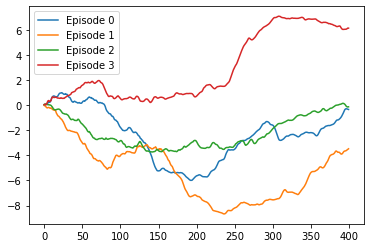

In [3]:
trainer.training_rewards_df.plot()

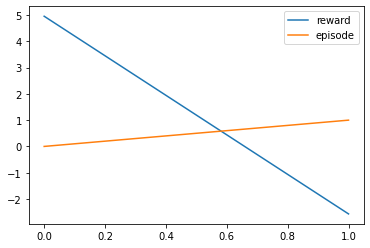

In [4]:
import pandas as pd 

pd.read_csv(r"C:\Users\email\Documents\LMU\4_Semester\ASP\Project\AlphaWorm\dev\models\2020-06-26\WormDomain-5_Default\best_agent\rewards.csv").plot()

In [3]:
env.close()

26.06.2020 23:04:32 INFO: Environment shut down with return code 0 (CTRL_C_EVENT).


In [5]:
import optuna
optuna.visualization.plot_optimization_history(study)

In [2]:
win_env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
env = get_env(win_env, True)

trainer = DDPGTrainer()

study = trainer.start_training(env, trials=2, render=False, name="WormDomain-4_HPO_Local", default=True)

19.06.2020 17:59:11 INFO: Connected to Unity environment with package version 1.0.2-preview and communication version 1.0.0
19.06.2020 17:59:12 INFO: Connected new brain:
WormDynamic?team=0
19.06.2020 17:59:12 INFO: Optuna set up - trials: 2, name: WormDomain-4_HPO_Local
19.06.2020 17:59:12 INFO: Start optimization!
19.06.2020 17:59:12 INFO: Start trial#0
19.06.2020 17:59:12 INFO: Start episodes (9) with 973 steps.
19.06.2020 18:08:56 INFO: End episode!
19.06.2020 18:08:56 INFO: Initial model stored.
19.06.2020 18:08:56 INFO: End trial#0
[I 2020-06-19 18:08:56,163] Finished trial#0 with value: -3.6340973953669566 with parameters: {'n_layers': 1, 'n_units_l0': 65, 'actor_lr': 3.5527033223440845e-05, 'critic_lr': 0.0006833920882663584, 'gamma': 0.1456759968546808, 'tau': 0.02910558222805777, 'episodes': 9, 'training_steps': 973, 'batch_size': 17}. Best is trial#0 with value: -3.6340973953669566.
19.06.2020 18:08:56 INFO: Start trial#1
19.06.2020 18:08:56 INFO: Start episodes (5) with 833

In [3]:
env.close()

26.06.2020 20:31:54 INFO: Environment shut down with return code 0 (CTRL_C_EVENT).


In [3]:
with open("../models/2020-06-17/WormDomain-1.pickle", 'rb') as f:
    best_agent = pickle.load(f)

In [6]:
win_env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
env = get_env(win_env, True)

best_agent.run(env, steps=1000)

INFO:mlagents_envs.environment:Connected to Unity environment with package version 1.0.2-preview and communication version 1.0.0
INFO:mlagents_envs.environment:Connected new brain:
WormDynamic?team=0


In [7]:
env.close()

INFO:mlagents_envs.environment:Environment shut down with return code 0 (CTRL_C_EVENT).


In [4]:
with open("models/2020-06-19/WormDomain-1.pickle", 'rb') as f:
    best_agent = pickle.load(f)

with open("models/2020-06-19/WormDomain-1_study.pickle", 'rb') as f:
    study = pickle.load(f)


In [5]:
study.best_params

{'n_layers': 1,
 'n_units_l0': 64,
 'actor_lr': 0.0008492177599151795,
 'critic_lr': 0.0003548308108793824,
 'gamma': 0.6656424824684831,
 'tau': 0.04338153107996659,
 'episodes': 5,
 'training_steps': 69,
 'batch_size': 12}

In [13]:
win_env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
env = get_env(win_env, True)

trial  = FixedTrial(study.best_params)
trainer = DDPGTrainer()

trainer.train(trial, env,  render=False, name="WormDomain-1x", training_steps = 1000)
env.close()

19.06.2020 14:58:05 INFO: Connected to Unity environment with package version 1.0.2-preview and communication version 1.0.0
19.06.2020 14:58:06 INFO: Connected new brain:
WormDynamic?team=0
19.06.2020 14:58:06 INFO: Start trial#0
19.06.2020 14:58:06 INFO: Start episodes (5) with 1000 steps.
19.06.2020 15:03:39 INFO: End episode!
19.06.2020 15:03:39 INFO: End trial#0
19.06.2020 15:03:40 INFO: Environment shut down with return code 0 (CTRL_C_EVENT).


In [19]:
env.close()

In [18]:
win_env = "envs/worm_dynamic_one_agent/win/UnityEnvironment"
env = get_env(None, True)

trainer.ddpg_agent.run(env, 1000)

19.06.2020 15:28:16 INFO: Listening on port 5004. Start training by pressing the Play button in the Unity Editor.
19.06.2020 15:28:27 INFO: Connected to Unity environment with package version 1.0.2 and communication version 1.0.0
19.06.2020 15:28:27 INFO: Connected new brain:
WormDynamic?team=0


In [4]:
import optuna

In [5]:
optuna.visualization.plot_intermediate_values(study)

In [6]:
optuna.visualization.plot_optimization_history(study)

In [7]:
optuna.visualization.plot_parallel_coordinate(study)

## Training Gym Domains

@author: jhuthmacher

In [1]:
import logging 
logging.basicConfig(level=logging.DEBUG)

import sys
sys.path.insert(0, "../")
import os
os.chdir("../")

import pickle

import gym
from trainer.ddpg_trainer import DDPGTrainer
from config.config import log

## Pendulum

In [3]:
############
# Penduluu #
############
env = gym.make("Pendulum-v0")

trainer = DDPGTrainer()

log.info("Start DDPG training (Pendulum)...")

trainer.config["training_steps"] = 200
trainer.config["episodes"] = 50

trainer.train_baseline(env, name="Test-File-Logging",render=False, nb_epochs=5,
                       nb_epoch_cycles=1, nb_rollout_steps=1,
                       nb_train_steps=1, nb_eval_steps=1)

log.info("Training done!")

INFO:root:Start DDPG training (Pendulum)...
INFO:root:Epoch: 0 / 5
INFO:root:Epoch: 1 / 5
INFO:root:Epoch: 2 / 5
INFO:root:Epoch: 3 / 5
INFO:root:Epoch: 4 / 5
INFO:root:Training done!


In [2]:
import pickle


with open(r"C:\Users\email\Documents\LMU\4_Semester\ASP\Project\AlphaWorm\dev\models\2020-07-03\DDPG-Pendulum-2\ddpg_baseline_training.pickle", "wb+") as f:
    pickle.dump(trainer.ddpg_agent, f)

NameError: name 'trainer' is not defined

In [3]:
import pickle

import sys
sys.path.insert(0, "../")

with open(r"C:\Users\email\Documents\LMU\4_Semester\ASP\Project\AlphaWorm\dev\models\2020-07-03\DDPG-Pendulum-2\ddpg_baseline_training.pickle", "rb") as f:
    ddpg_agent = pickle.load(f)
    # ddpg_agent.run(env, steps=100, render=True)

EOFError: Ran out of input

In [6]:
ddpg_agent

---

## Mountain Car

In [9]:
env = gym.make("MountainCarContinuous-v0")

trainer = DDPGTrainer()

study = trainer.start_training(env, trials=10, render=False, name="MountainCar-1")

[I 2020-06-17 09:55:19,172] Finished trial#0 with value: -0.86143798645482 with parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 20, 'actor_lr': 0.07243559536176297, 'critic_lr': 0.01320511907578651, 'gamma': 0.9046742938788728, 'tau': 0.012398941132184193, 'episodes': 14, 'training_steps': 13, 'batch_size': 15}. Best is trial#0 with value: -0.86143798645482.
[I 2020-06-17 09:55:19,632] Finished trial#1 with value: -0.6300303396351985 with parameters: {'n_layers': 2, 'n_units_l0': 54, 'n_units_l1': 116, 'actor_lr': 0.06879994480195133, 'critic_lr': 0.08549541625359897, 'gamma': 0.1509626716289234, 'tau': 0.015412280329085837, 'episodes': 13, 'training_steps': 10, 'batch_size': 11}. Best is trial#1 with value: -0.6300303396351985.
[I 2020-06-17 09:55:20,042] Finished trial#2 with value: -0.9198870582350983 with parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 78, 'actor_lr': 0.0892403870902108, 'critic_lr': 0.03489305319800736, 'gamma': 0.1372472427008143, 'tau': 

In [10]:
with open("../models/2020-06-17/MountainCar-1.pickle", 'rb') as f:
    best_agent = pickle.load(f)

In [15]:
best_agent.run(env, steps=1000)

In [16]:
env.close()

In [6]:
import optuna

# Read the study from a specific run to visualize.
with open("../models/2020-06-17/MountainCar_study.pickle", 'rb') as f:
    study = pickle.load(f)
optuna.visualization.plot_intermediate_values(study)

In [7]:
optuna.visualization.plot_optimization_history(study)